In [1]:
%matplotlib inline

import sys
import os
ROOT_DIR = "../"
sys.path.append(ROOT_DIR) # 
from valhalla.data import DataLoader, get_category_map
import numpy as np
import pandas as pd
import shutil

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

hangul_font_path = "../etc/godoMaum.ttf" # godo에서 제공해주는 무료 한글 폰트입니다
PREP_PATH = "../data/prep/textOnly.h5"
CATE_PATH = "../data/raw/cate1.json"

### (optional)Matplotlib에서 한글 폰트 적용하기

* reference : [Matplotlib + 한글 (Windows 아나콘다) 블로그](https://financedata.github.io/posts/matplotlib-hangul-for-windows-anaconda.html)

위의 참고자료를 바탕으로 진행하였습니다. 감사합니다 블로그 저작자님!

크게 3가지 단계로 진행됩니다.

1. matplotlib 폴더에 font 파일을 옮기기
2. matplotlib 캐시 폴더를 지우기
3. 이 스크립트를 재 실행하기

In [2]:
# 1. matplotlib 폴더에 font 파일을 옮기기
mpl_dir = os.path.split(matplotlib.__file__)[0]
font_install_path = os.path.join(mpl_dir,"mpl-data/fonts/ttf")
print("font 설치 경로 : \n{}\n".format(font_install_path))

shutil.copy(hangul_font_path,font_install_path) # 폰트 파일을 복사하기

# 2. matplotlib 캐시 파일 제거하기
mpl_cache_dir = matplotlib.get_cachedir()
shutil.rmtree(mpl_cache_dir) # 캐시 폴더 제거하기

font 설치 경로 : 
/Users/ksj/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf



이제 스크립트를 다시 껐다가 다시 실행해주세요! (matplotlib을 다시 실행시킬 때, 캐시 폴더를 재생성하면서, 폰트 설치를 완료시킬 겁니다

In [3]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
flag = False
for font_name in font_list:
    if "godoMaum" in font_name:
        print("godoMaum이 성공적으로 설치되었습니다.{}".format(font_name))
        flag = True
        # matplotlib 전역 설정하기
        font_family = (fm
                       .FontProperties(fname=hangul_font_path)
                       .get_name())
        # 폰트 스타일 변경 (한글이 출력 가능하도록)
        plt.rcParams["font.family"] = font_family
        
if not flag:
    raise ValueError("godoMaum이 설치가 안되었습니다 ㅠㅠ")

godoMaum이 성공적으로 설치되었습니다./Users/ksj/Library/Fonts/godoMaum.ttf


**정상적으로 한글 폰트가 설치된 상태일겁니다 **

*안되면, 깃이슈로 남겨주세요 ㅠ *

----

In [4]:
# 데이터 로드하기
dl = DataLoader(PREP_PATH,subset_name='train')
cate_map = get_category_map(CATE_PATH)

## 1) 데이터의 갯수

In [5]:
print("row   의 수 : {}".format(len(dl['bcateid',:])))
print("column의 수 : {}".format(len(dl.columns)))
print("column     : {}".format(dl.columns))

row   의 수 : 8134818
column의 수 : 11
column     : ['bcateid', 'dcateid', 'mcateid', 'price', 'scateid', 'brand', 'maker', 'model', 'pid', 'product', 'updttm']


800만여줄의 row와 11가지의 column으로 구성되어 있다.

## 2) 카테고리 분석

카테고리에 대해서, 제일 궁금한 점들은 아래와 같다

* 카카오에서 제공한 카테고리의 코드는 어떤 식으로 구성되어 있을까?
* 어떻게 unique하게 카테고리를 나눌까? 
* 카테고리 별로 데이터가 균등하게 나뉘어져 있을까?
* 카테고리와 가격의 상관관계는?
* 카테고리 별로 인기 있는 브랜드는 뭘까? 

### 1) 카카오에서 제공한 카테고리의 코드는 어떤 식으로 구성되어 있을까?

#### bcateid

In [6]:
cat_name = "bcateid"

print("{} 예시 : \n\t{}".format(cat_name,dl[cat_name].unique()[:10]))
print("{} min : {} \n{} max : {}".format(cat_name,
    min(dl[cat_name]),cat_name,max(dl[cat_name])))

sorting = sorted(dl[cat_name].unique())

print("{} sorting 첫 5개: \n\t{}".format(cat_name,sorting[:5]))
print("{} sorting 뒷 5개: \n\t{}".format(cat_name,sorting[-5:]))

bcateid 예시 : 
	[24 17 35 40 54 34 14  3 11 16]
bcateid min : 1 
bcateid max : 57
bcateid sorting 첫 5개: 
	[1, 2, 3, 4, 5]
bcateid sorting 뒷 5개: 
	[53, 54, 55, 56, 57]


> 딱 봐도 1부터 57까지 순서대로 박혀있는 것으로 보인다. 한 번 확인해보자

In [7]:
sorted(dl['bcateid'].unique()) == list(range(1,58))

True

> 역시 맞다

#### mcateid

In [8]:
cat_name = "mcateid"

print("{} 예시 : \n\t{}".format(cat_name,dl[cat_name].unique()[:10]))
print("{} min : {} \n{} max : {}".format(cat_name,
    min(dl[cat_name]),cat_name,max(dl[cat_name])))

sorting = sorted(dl[cat_name].unique())

print("{} sorting 첫 5개: \n\t{}".format(cat_name,sorting[:5]))
print("{} sorting 뒷 5개: \n\t{}".format(cat_name,sorting[-5:]))

mcateid 예시 : 
	[ 73  20  31 173 125 467  68 325  13   3]
mcateid min : 1 
mcateid max : 552
mcateid sorting 첫 5개: 
	[1, 2, 3, 4, 5]
mcateid sorting 뒷 5개: 
	[548, 549, 550, 551, 552]


> 딱 봐도 1부터 552까지 순서대로 박혀있는 것으로 보인다. 한 번 확인해보자

In [9]:
sorted(dl['mcateid'].unique()) == list(range(1,553))

True

이것도 순서대로 1부터 552까지 나열되어 있다.

#### scateid

In [10]:
cat_name = "scateid"

print("{} 예시 : \n\t{}".format(cat_name,dl[cat_name].unique()[:10]))
print("{} min : {} \n{} max : {}".format(cat_name,
    min(dl[cat_name]),cat_name,max(dl[cat_name])))

sorting = sorted(dl[cat_name].unique())

print("{} sorting 첫 5개: \n\t{}".format(cat_name,sorting[:5]))
print("{} sorting 뒷 5개: \n\t{}".format(cat_name,sorting[-5:]))

scateid 예시 : 
	[ 436   22   34  826 1694 2082 1782  769   54   38]
scateid min : -1 
scateid max : 3190
scateid sorting 첫 5개: 
	[-1, 2, 3, 4, 5]
scateid sorting 뒷 5개: 
	[3186, 3187, 3188, 3189, 3190]


> bcateid, mcateid와 달리 0과 1을 빼고, -1, 2~3190의 범위를 가지고 있을 거 같다

In [11]:
sorted(dl['scateid'].unique()) == [-1]+list(range(2,3191))

True

Null 값을 가지고 있는 scateid의 경우에는 이럴 수 밖에 없을 거 같다

#### dcateid

In [12]:
cat_name = "dcateid"

print("{} 예시 : \n\t{}".format(
    cat_name,dl[cat_name].unique()[:10]))
print("{} min : {} \n{} max : {}".format(cat_name,
    min(dl[cat_name]),cat_name,max(dl[cat_name])))

sorting = sorted(dl[cat_name].unique())

print("{} sorting 첫 5개: \n\t{}".format(
    cat_name,sorting[:5]))
print("{} sorting 뒷 5개: \n\t{}".format(
    cat_name,sorting[-5:]))

dcateid 예시 : 
	[ -1   5   8  61  93 253  55 196  14   4]
dcateid min : -1 
dcateid max : 404
dcateid sorting 첫 5개: 
	[-1, 2, 3, 4, 5]
dcateid sorting 뒷 5개: 
	[400, 401, 402, 403, 404]


> scateid처럼, -1, 2~404의 범위를 가지고 있을 거 같다

In [13]:
sorted(dl['dcateid'].unique()) == [-1]+list(range(2,405))

True

scateid와 같은 구조이다

위의 내용을 전부 정리해보자면

| | bcateid | mcateid | scateid | dcateid |
|----|----|----|----| ----|
|  Null 존재  |  x  |  x  | -1   |  -1   |
|  최소값      | 1   |  1  | 2  |   2   |
|  최대값      | 57  | 552 | 3190 | 404 |

### 2) 어떻게 unique하게 카테고리를 나눌까? 

> 우리는 어떤 식으로 이 카테고리에 고유 카테고리를 매길 수 있을까? 모든 카테고리의 가장 밑단 카테고리가 같으면, 동일한 카테고리라고 말할 수 있을까? 

dcateid가 같았을 때 다른 bcateid, mcateid, scateid가 모두 같다면 그렇다고 얘기할 수 있을 것이다

In [14]:
(dl[['bcateid','mcateid','scateid','dcateid']]
 .drop_duplicates()
 .groupby('dcateid')
 .count()
 .sort_values("scateid",ascending=False)[:5]
)

,bcateid,mcateid,scateid
dcateid,,,
-1,3733,3733,3733
227,54,54,54
219,14,14,14
2,3,3,3
312,3,3,3


-1은 null 값이라(세분류가 없는 상황) 중복이 발생하는 것이 정상적이다.하지만 227, 219, 2, 312의 경우는 다른데 , 특히 dcateid가 227일 때, 중복이 많이 보이는데 이경우를 뜯어보자

In [15]:
df = dl[['bcateid','mcateid','scateid','dcateid']]
x = df[df.dcateid==227].drop_duplicates()

for col_name in df.columns:
    x[col_name] = x[col_name].map(cate_map[col_name])
    
x[:10]

,bcateid,mcateid,scateid,dcateid
982,해외여행,미주/캐나다,미국(기타),숙박
1031,해외여행,남태평양,호주(기타),숙박
3292,해외여행,유럽,프랑스,숙박
11078,해외여행,동남아,태국(푸켓),숙박
11190,해외여행,유럽,독일,숙박
16435,해외여행,유럽,이탈리아,숙박
17574,해외여행,중국/홍콩/대만,대만,숙박
20992,해외여행,동남아,인도,숙박
22552,해외여행,일본,일본(기타),숙박
24005,해외여행,미주/캐나다,로스앤젤레스,숙박


여행 상품의 구성이었다. 위의 경우를 미루어보아,

꼭 세부 카테고리('dcateid==227')가 같더라도, bcateid, mcateid, scateid가 같다는 보장이 없다. 그럼 uniqueid를 보장받기 위해서는, bcateid, mcateid, scateid, dcateid 모두 같아야만 한다.

-----

### 3) 카테고리 별로 데이터가 균등하게 나뉘어져 있을까?

> 카테고리 별로 데이터가 어느정도 균등하게 모여있는지를 한번 확인해 보자 

In [16]:
# 데이터 가져오기
df = dl[['pid','bcateid','mcateid','scateid','dcateid']]
for col_name in ['bcateid','mcateid','scateid','dcateid']:
    df[col_name] = df[col_name].map(cate_map[col_name])

# category 타입으로 변경
df.loc[:,['bcateid','mcateid','scateid','dcateid']] = (
df.loc[:,['bcateid','mcateid','scateid','dcateid']].astype('category'))

일단 대분류 별로 상위 10개 하위 10개를 확인해보자

In [17]:
# 대분류 Top 10
count_ids = (df['bcateid']
 .value_counts()
 .sort_values(ascending=False))

print("대분류별 아이템 수 상위 10개\n")
tot = count_ids.sum()
for key, value in count_ids[:10].items():
    print("{:>15}  ---- {}({:2.3f}%)".format(key,value,value/tot*100))

print("\n-------------\n")

print("대분류별 아이템 수 하위 10개\n")
tot = count_ids.sum()
for key, value in count_ids[-10:].items():
    print("{:>15}  ---- {}({:2.3f}%)".format(key,value,value/tot*100))


대분류별 아이템 수 상위 10개

       가방/지갑/잡화  ---- 572932(7.043%)
           여성의류  ---- 470785(5.787%)
       주방/식기/용기  ---- 451696(5.553%)
       휴대폰/액세서리  ---- 411935(5.064%)
         신발/수제화  ---- 397516(4.887%)
       문구/사무/용지  ---- 377532(4.641%)
     산업/공구/안전용품  ---- 364307(4.478%)
  프린터/PC주변/사무기기  ---- 330966(4.069%)
     홈/인테리어/가드닝  ---- 325045(3.996%)
   스포츠의류/운동화/잡화  ---- 302799(3.722%)

-------------

대분류별 아이템 수 하위 10개

    이미용/건강/욕실가전  ---- 17640(0.217%)
        테마의류/잡화  ---- 13801(0.170%)
           해외여행  ---- 8071(0.099%)
     분유/기저귀/물티슈  ---- 7465(0.092%)
   내비/블랙박스/하이패스  ---- 7406(0.091%)
        게임/주변기기  ---- 7056(0.087%)
           국내여행  ---- 3385(0.042%)
             성인  ---- 1666(0.020%)
             공연  ---- 991(0.012%)
             여행  ---- 54(0.001%)


> 시각적으로 한번 확인해보자

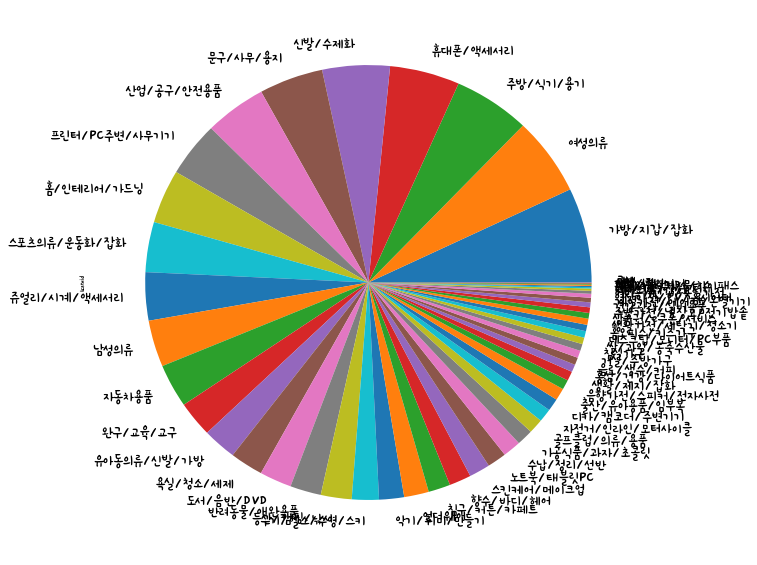

In [18]:
count_ids.plot(kind='pie',figsize=(10,10),fontsize=20);

> 상품 수에서 현저하게 차이가 난다. 향 후 이렇게 적은 데이터 셋에선 어떤 식으로 문제를 해결할 지 고민을 해 볼 필요가 있다.

In [19]:
# 특히 여행 큰 카테고리는 여행 - 여행용품 - 여행가방 - 백팩으로만 구성되어 있다.
df[df.bcateid=='여행'][:20]

,pid,bcateid,mcateid,scateid,dcateid
1000497,I4249439772,여행,여행용품,여행가방,백팩
1006205,G4582443357,여행,여행용품,여행가방,백팩
1014576,I2302315015,여행,여행용품,여행가방,백팩
1054318,V4308209238,여행,여행용품,여행가방,백팩
1066382,S421089315,여행,여행용품,여행가방,백팩
1103030,T3185684113,여행,여행용품,여행가방,백팩
1192170,R4468769733,여행,여행용품,여행가방,백팩
1213821,M4372918796,여행,여행용품,여행가방,백팩
1221944,H4153052717,여행,여행용품,여행가방,백팩
1241307,Z4190527697,여행,여행용품,여행가방,백팩


대분류와 중분류를 겹쳐서 파이그래프로 한번 확인해보자

In [20]:
# Dataframe을 대분류의 데이터 갯수 순으로 정렬
h_count_ids = (df
               .set_index(['bcateid','mcateid'])
               .groupby(['bcateid','mcateid'])['pid']
               .count())
h_count_df = pd.DataFrame(h_count_ids).reset_index()

_sort_axis = h_count_df.groupby('bcateid')['pid'].sum().to_dict()
h_count_df.loc[:,'bcate_sort'] = h_count_df.bcateid.map(_sort_axis)
h_count_df = h_count_df.sort_values('bcate_sort',ascending=False)

h_count_df = h_count_df.drop('bcate_sort',axis=1)

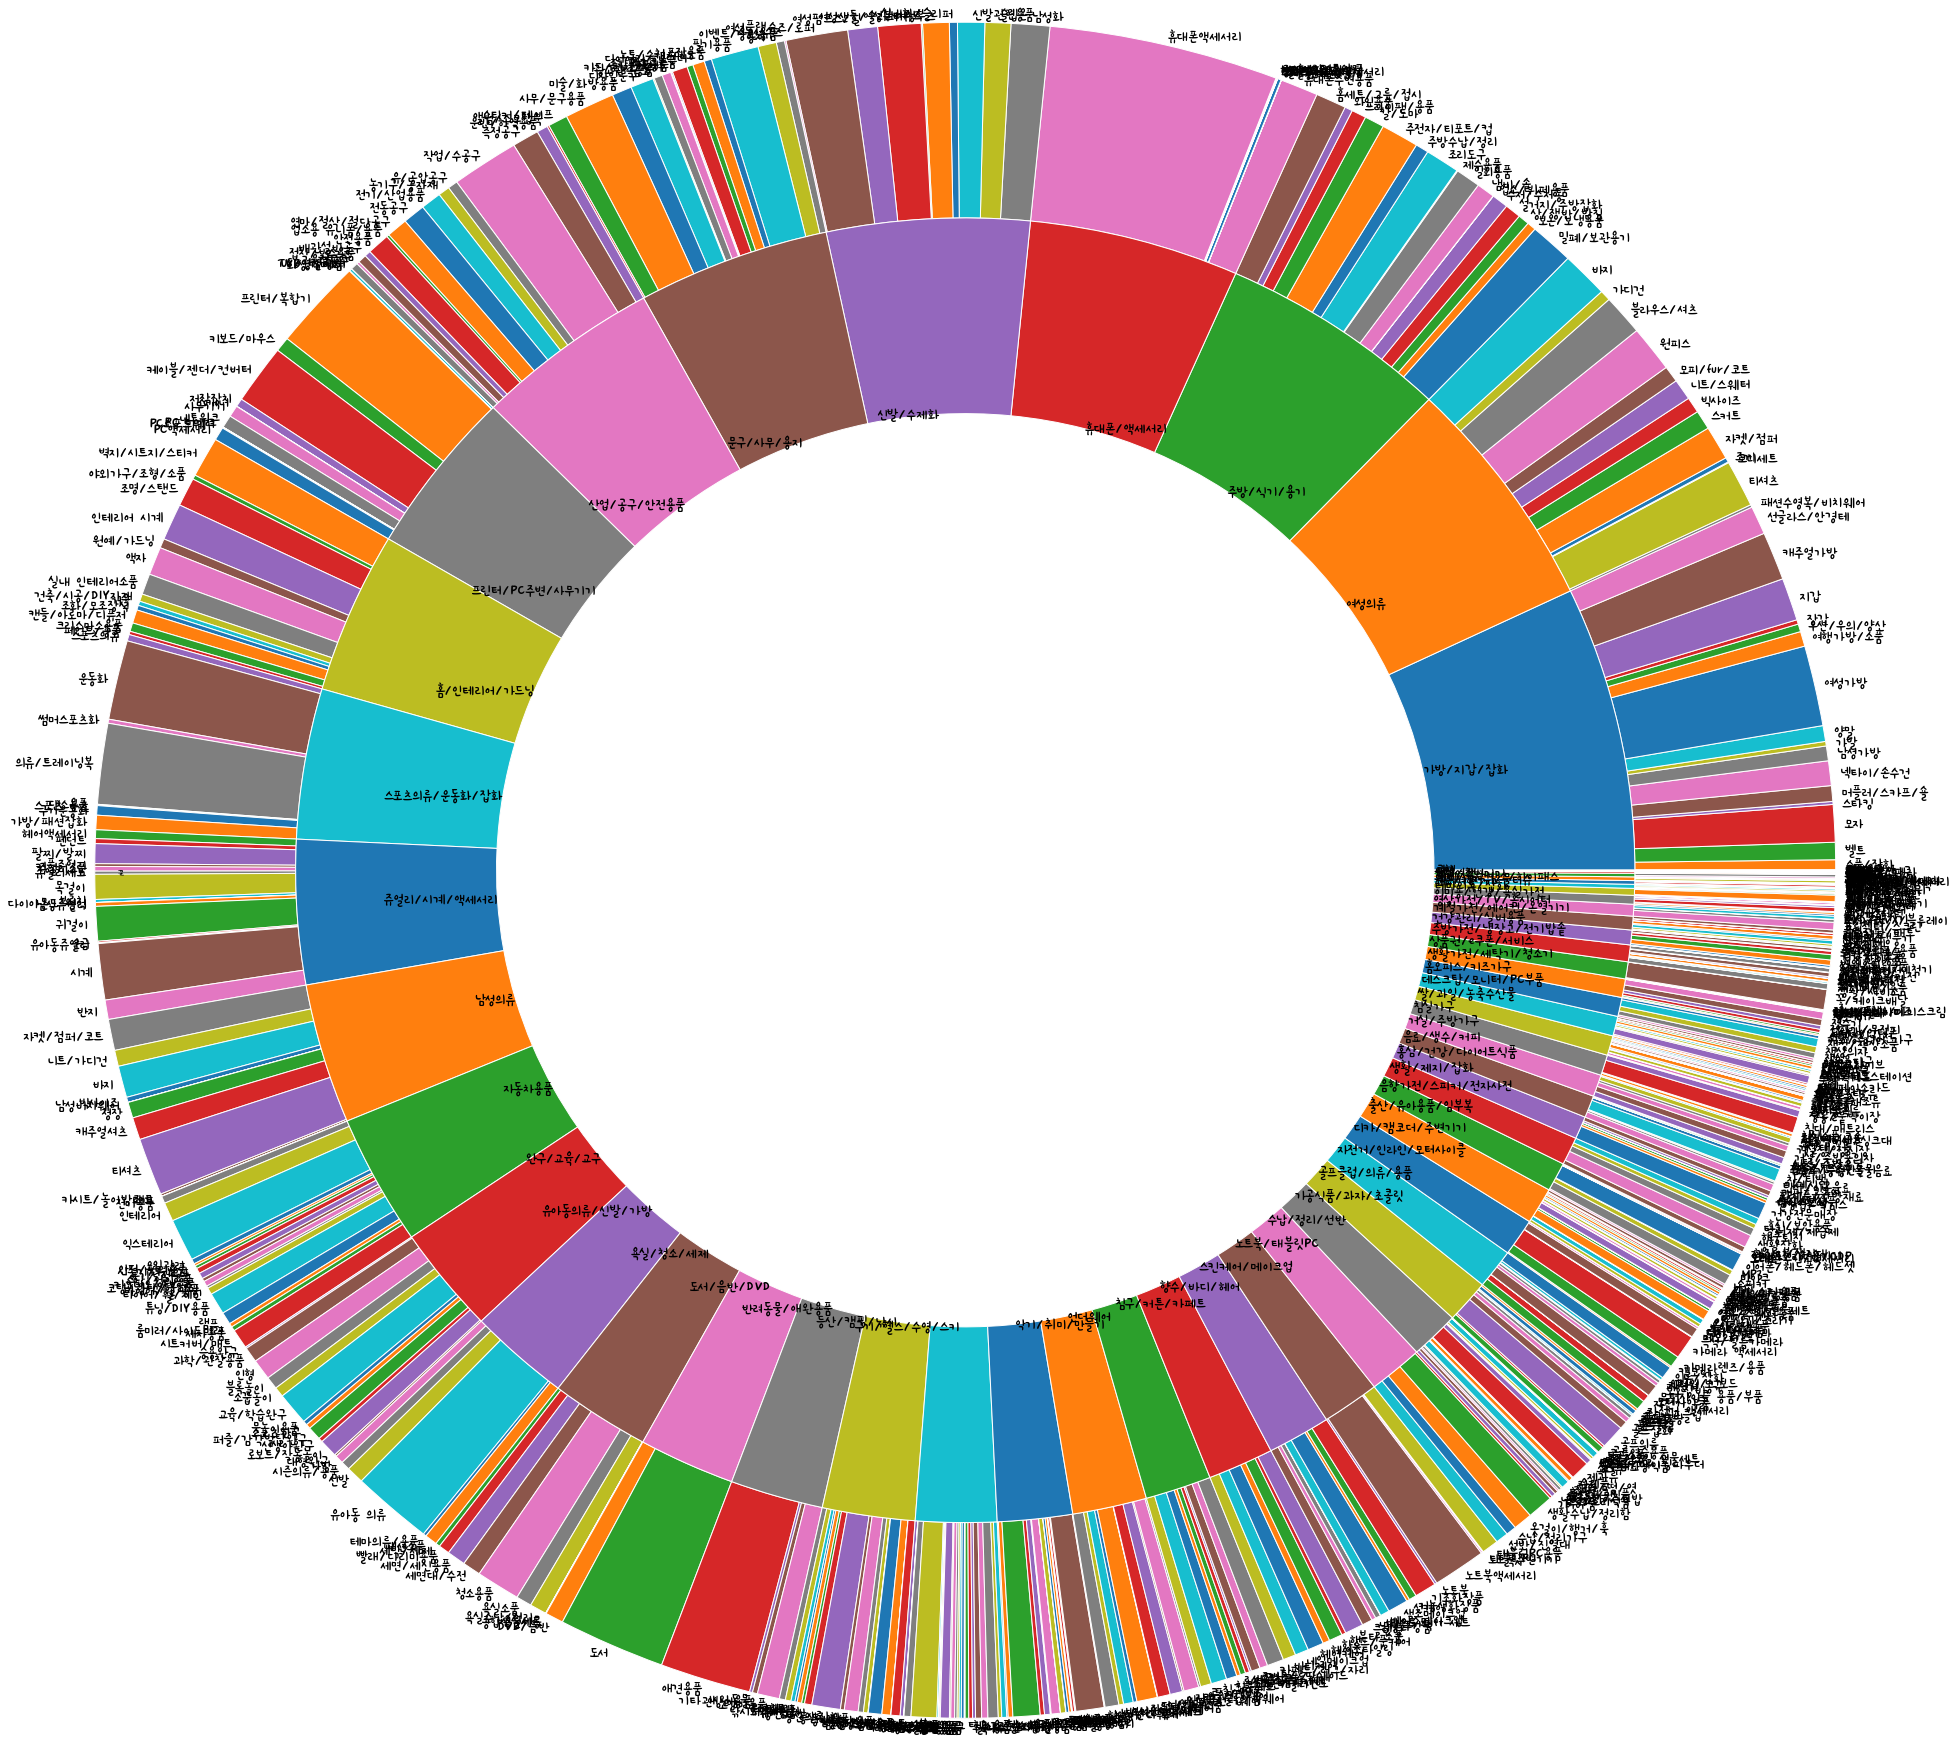

In [21]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
radius = 1
width = 0.3

# 바깥원 : 중분류
(h_count_df
 .set_index('mcateid')['pid']
 .plot(kind='pie',
       ax=ax,
       fontsize=20,
       radius= radius+width,
       wedgeprops=dict(width=width,edgecolor='w'),
       labeldistance=1.01)
);

# 안쪽원 : 대분류
(h_count_df
 .groupby('bcateid')['pid']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='pie',
       ax=ax,
       fontsize=20,
       radius=radius,
       wedgeprops=dict(width=width,edgecolor='w'),
       labeldistance=0.7)
);

이렇게 보면 좀 직관적으로 보이는 것 중 하나가
   
   1) 가방/지갑/잡화 와 여성의류, 주방/식기/용기, 휴대폰/액세서리 등 이 많이 차지하고
   
   2) 특정 대분류 경우 중분류가 지나치게 쏠려 있는 경우들이 많이 보인다. (도서, 발려동물, 휴대폰/악세사리등)

### 카테고리 별 가격대

> 카테고리 별 가격 정보가 유의미할 수 있을지 간단히 살펴보자

In [22]:
df = dl[['price','bcateid','mcateid','scateid','dcateid']]

for col_name in ['bcateid','mcateid','scateid','dcateid']:
    df[col_name] = df[col_name].map(cate_map[col_name])

# category 타입으로 변경
df.loc[:,['bcateid','mcateid','scateid','dcateid']] = (
df.loc[:,['bcateid','mcateid','scateid','dcateid']].astype('category'))

가격이 명시된 비율이 얼마나 될까?

In [23]:
print("가격이 명시된 비율 : {:2.3f}%".format(
    df[df.price != -1].shape[0]/df.price.shape[0] *100))

가격이 명시된 비율 : 35.207%


> 생각보다 가격이 명시되지 않았다. 그럼 카테고리 별로 가격이 명시되지 않은 비율이 비슷할까? 

In [24]:
ratio = (df[df.price != -1].bcateid.value_counts()
        / df.bcateid.value_counts() * 100)
ratio = ratio.sort_values(ascending=False)

print("가격이 명시된 비율 중 상위 10")
print("대분류별 아이템 수 상위 10개\n")
tot = ratio.sum()
for key, value in ratio[:10].items():
    print("{:>15}  ---- {:2.3f}%".format(key,value))
print("\n-------------\n")
print("가격이 명시된 비율 중 하위 10")
for key, value in ratio[-10:].items():
    print("{:>15}  ---- {:2.3f}%".format(key,value))

가격이 명시된 비율 중 상위 10
대분류별 아이템 수 상위 10개

    상품권/e쿠폰/서비스  ---- 83.115%
             성인  ---- 76.050%
           국내여행  ---- 50.517%
      도서/음반/DVD  ---- 48.943%
       휴대폰/액세서리  ---- 44.425%
             여행  ---- 40.741%
      홈오피스/키즈가구  ---- 40.200%
  데스크탑/모니터/PC부품  ---- 38.577%
    디카/캠코더/주변기기  ---- 38.555%
   홍삼/건강/다이어트식품  ---- 38.531%

-------------

가격이 명시된 비율 중 하위 10
    가공식품/과자/초콜릿  ---- 30.540%
       완구/교육/교구  ---- 30.482%
       음료/생수/커피  ---- 30.282%
   내비/블랙박스/하이패스  ---- 28.828%
     쌀/과일/농축수산물  ---- 28.433%
     분유/기저귀/물티슈  ---- 27.502%
        테마의류/잡화  ---- 26.129%
  자전거/인라인/모터사이클  ---- 23.816%
        게임/주변기기  ---- 23.781%
             공연  ---- 2.321%


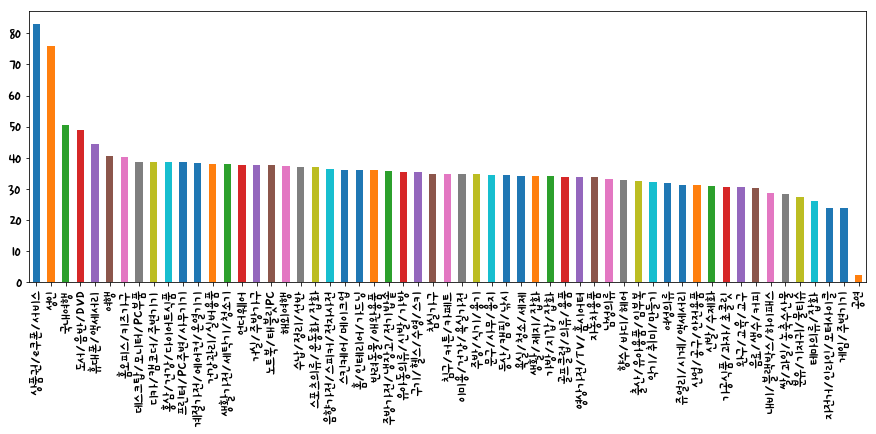

In [25]:
ratio.plot(kind='bar',figsize=(15,5),fontsize=20);

> 특정 카테고리 빼고는 가격 명세 비율은 거의 비슷하다. 가격의 존재 유무가 크게 가치 없을 수 있다.

카테고리 별 평균 가격대는 어떤 식일까?

In [26]:
avg_price = (df[df.price != -1]
             .groupby('bcateid')['price']
             .mean()
             .astype(int)
             .sort_values(ascending=False))

print("카테고리별 평균 가격대 상위 10")
for key, value in avg_price[:10].items():
    print("{:>15}  ---- {}".format(key,value))
print("\n-------------\n")
print("카테고리별 평균 가격대 하위 10")
for key, value in avg_price[-10:].items():
    print("{:>15}  ---- {}".format(key,value))


카테고리별 평균 가격대 상위 10
   영상가전/TV/홈시어터  ---- 1301351
  계절가전/에어컨/온열기기  ---- 604858
           침실가구  ---- 594789
  주방가전/냉장고/전기밥솥  ---- 529008
  데스크탑/모니터/PC부품  ---- 448288
        거실/주방가구  ---- 403683
           해외여행  ---- 296633
    쥬얼리/시계/액세서리  ---- 270402
  음향가전/스피커/전자사전  ---- 264649
   생활가전/세탁기/청소기  ---- 234018

-------------

카테고리별 평균 가격대 하위 10
       문구/사무/용지  ---- 35157
           언더웨어  ---- 32831
        테마의류/잡화  ---- 31996
    가공식품/과자/초콜릿  ---- 30198
       욕실/청소/세제  ---- 29962
      반려동물/애완용품  ---- 28759
       음료/생수/커피  ---- 27369
      도서/음반/DVD  ---- 27169
             공연  ---- 24174
       휴대폰/액세서리  ---- 21431


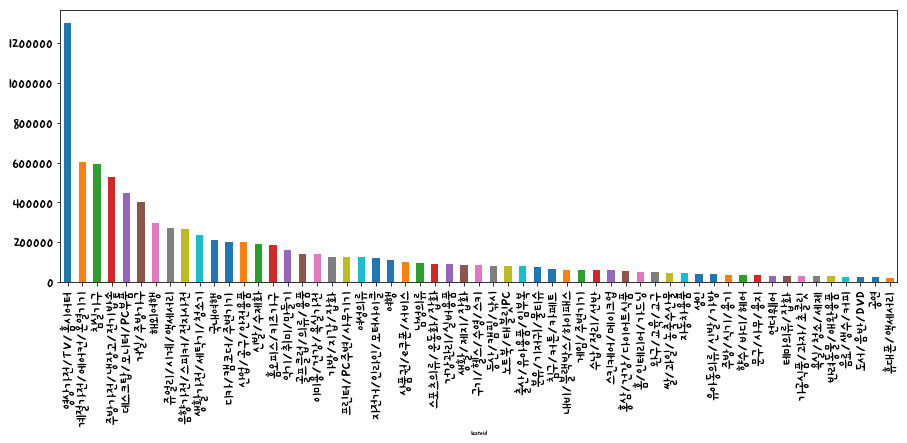

In [27]:
avg_price.plot(kind='bar',figsize=(15,5),fontsize=20);

> 가격 정보는 약간 애매한 느낌이 있다. 생각보다 대부분 가격대가 비등배등한 위치에 자리잡고 있다. 

### 카테고리 별로 인기 있는 브랜드는 뭘까? 

> 카테고리 별로 브랜드에 대한 차이를 눈으로 확인해보자

In [28]:
df = dl[['brand','maker','bcateid','mcateid','scateid','dcateid']]

for col_name in ['bcateid','mcateid','scateid','dcateid']:
    df[col_name] = df[col_name].map(cate_map[col_name])

In [29]:
df.brand.value_counts(ascending=False)[:20]

             3930113
상품상세설명 참조     153156
바보사랑           66645
기타             64144
상세설명참조         35795
없음             33603
아디다스           32292
나이키            30785
아트박스           28518
알수없음           26768
1300K          20791
텐바이텐           15397
핫트랙스           14835
삼성전자           14770
오가닉맘           14694
후추통-감성쇼핑       14288
인터파크           13854
꾸밈             13248
자체브랜드          13032
상세정보참조         12936
Name: brand, dtype: int64

의미 없는 브랜드 정보가 매우 많다. 일단 간단히 솎아 보자

In [30]:
not_brands = ['','상품상세설명 참조','기타',
              '상세설명참조','없음','알수없음',
              '자체브랜드','상세정보참조', "상세페이지참조",
              '별도표기','[상품상세설명 참조]','알수 없음',
              "상세페이지 참조","브랜드없음",'(기타)','상세설명참고']

대충 눈으로 솎아내고 다시 보면 아래와 같다

In [31]:
df = df.loc[~df.brand.isin(not_brands)]
df.loc[:,'brand'].value_counts()[:20]

바보사랑        66645
아디다스        32292
나이키         30785
아트박스        28518
1300K       20791
텐바이텐        15397
핫트랙스        14835
삼성전자        14770
오가닉맘        14694
후추통-감성쇼핑    14288
인터파크        13854
꾸밈          13248
화환전문점       12878
롯데아이몰       11283
COMS        10446
해외업체        10275
3M          10035
탠디           9530
HP           8882
아레나          8443
Name: brand, dtype: int64

그럼 카테고리 별로 베스트 브랜드는 많이 다를까? 

In [32]:
nums = 10
for cate_name in df.bcateid.unique():
    tops = df.loc[df.bcateid==cate_name,'brand'].value_counts(ascending=False)[:nums]
    print("{} : \n{}\n".format(cate_name,list(tops.index)))

프린터/PC주변/사무기기 : 
['HP', 'COMS', '캐논', '삼성전자', 'Coms', '강원전자', 'hp', '삼성', '이지넷유비쿼터스', '엡손']

욕실/청소/세제 : 
['송월타월', 'LOVING HOME', 'ABM', '3M', '바보사랑', '자주[JAJU]', '샤바스', '아트박스', '삼정크린마스터', '동영나이스']

상품권/e쿠폰/서비스 : 
['화환전문점', '백호꽃집', '꽃배달화랑', '꽃배달늑대와여우', '삼성꽃집', '꽃배달꽃집영웅', '플라워짱', '유어버스데이', '우리닷컴', '()우리닷컴']

가방/지갑/잡화 : 
['바보사랑', '닥스', '빌리버스', '헤지스ACC', '루이까또즈', '키플링', '아트박스', '프라다', '레스포색', '엘케이트']

휴대폰/액세서리 : 
['바보사랑', 'SUB', '얀케이스', '아이콘팜', '아트박스', '디팍스', '1300K', '후추통(키덜트,취미)', '후추통-감성쇼핑', '머큐리']

문구/사무/용지 : 
['바보사랑', '3M', '아트박스', '아트사인', '핫트랙스', '프린텍', '오피스디포', '후추통-감성쇼핑', '유니온플러스', '아트박스 POOM(문구,팬시)']

홈/인테리어/가드닝 : 
['바보사랑', '꾸밈', '아트박스', '핫트랙스', '1300K', '후추통-감성쇼핑', '쇼핑아트', '텐바이텐', 'Maison TICIA', '후추통(가구,인테리어)']

주방/식기/용기 : 
['키친아트', '바보사랑', '와인앤쿡', '아트박스', 'ABM', '해외업체', '락앤락', 'Maison TICIA', '퀸센스', '1300K']

노트북/태블릿PC : 
['카라스인터내셔널', '카라스', '힐링쉴드', '바보사랑', '삼성전자', '티테크놀로지', 'HP', 'LG전자', '후추통-감성쇼핑', '후추통(키덜트,취미)']

스포츠의류/운동화/잡화 : 
['아디다스', '나이키', '뉴발란스', '푸마', '리복', '프로스펙스', '

> 카테고리 별로 주요 브랜드에 대한 차이가 확연히 보인다.

하지만 수정해 나가야 하는 부분으로서, 브랜드에 대한 서로 다른 표기법들을 잡아나갈 필요가 있어 보인다.

ex)  삼성 - 삼성전자, 라디오사(LaDiosa) - 라디오사, 후추통-감성쇼핑, 후추통(키덜트,취미)
